# Приключение с DBSCAN: Открываем Сокровища в Данных!

Добро пожаловать в мир DBSCAN - алгоритма кластеризации данных, который как настоящий детектив раскрывает тайны плотности в наших датасетах! 🕵️‍♂️

## Краткий Обзор

DBSCAN, или Density-Based Spatial Clustering of Applications with Noise, не просто алгоритм, а настоящий герой мира машинного обучения. Он работает, смотря на данные, как на зашифрованный сокровищницу карту, и с умом распределяет точки по кластерам.

## Как Он Это Делает?

1. **Бдительность к Плотности:** DBSCAN не теряет бдительность даже в самых густонаселенных областях данных. Он идентифицирует кластеры, основываясь на плотности точек, игнорируя редкие облака данных.

2. **Бесстрашная Борьба с Шумом:** DBSCAN, как истинный детектив, не боится шума. Он выделяет одинокие точки как аномалии, не позволяя им мешать его делу.

3. **Способность К Адаптации:** Этот алгоритм не требует заранее заданного количества кластеров. Он самостоятельно находит скрытые паттерны и определяет количество кластеров динамически.

## Зачем Мы Его Любим?

### Плюсы:

- **Саморегулирующийся:** Нет необходимости задавать число кластеров - DBSCAN сам определит оптимальное количество, следуя плотности данных.
  
- **Противостояние Шуму:** Способность отличать шум от настоящих кластеров делает его идеальным инструментом для работы с реальными, зашумленными данными.

- **Гибкость:** Подходит для различных форм кластеров и формирует их, даже если они не имеют выпуклых форм.

### Минусы:

- **Чувствительность к Параметрам:** Настройка параметров DBSCAN может быть как поиск подходящего ключа к сокровищнице - это требует внимательности и опыта.

- **Не Справляется с Разнородными Кластерами:** Если кластеры имеют различную плотность, DBSCAN может испытывать трудности.

## Вывод

DBSCAN - это настоящий герой мира кластеризации данных, обладающий интеллектом и адаптивностью. Расшифруйте ваши данные вместе с DBSCAN и откройте двери к новым открытиям в мире машинного обучения!


# За Кулисами DBSCAN: Раскрываем Алгоритм

DBSCAN - это не просто алгоритм, это настоящий детектив данных, который следит за плотностью точек и находит скрытые кластеры. Давайте раскроем его методику:

## 1. Определение Эпицентров (Core Points)

Алгоритм начинает свою работу, выбирая случайную точку в датасете. Если в окрестности этой точки находится достаточное количество других точек (задаваемое параметром epsilon), эта точка считается "эпицентром" и становится ядром потенциального кластера.

## 2. Распространение Плотности

DBSCAN теперь распространяет свои нити плотности от найденного эпицентра. Он ищет все точки, которые достаточно близки к ядру, чтобы считаться частью кластера, и таким образом формирует первичный кластер.

## 3. Поиск Границ

Далее алгоритм обращает внимание на точки, которые могут быть не ядрами, но находятся достаточно близко к другим ядрам. Эти точки считаются граничными (Border Points) и добавляются к соответствующим кластерам.

## 4. Обнаружение Шума

Точки, которые не являются ядрами и не находятся близко к другим ядрам, считаются шумовыми (Noise Points) и исключаются из кластеров.

## 5. Рекурсивный Процесс

Этот процесс повторяется для каждого найденного эпицентра, пока все точки не будут отнесены к какому-то кластеру или же обозначены как шум.

## 6. Гибкость и Автоматизация

DBSCAN адаптивен к плотности данных, и не требует предварительной информации о количестве кластеров. Это позволяет ему обнаруживать кластеры различной формы и размеров, делая его мощным инструментом для разнообразных наборов данных.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [35]:
data = pd.read_csv("Datasets/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [37]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
data.drop(["date", "id", "zipcode", "condition", "lat", "long"], axis=1, inplace=True)


In [39]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,7.656873,1788.396095,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,1.175459,828.128162,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [40]:
data.shape

(21613, 15)

In [41]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

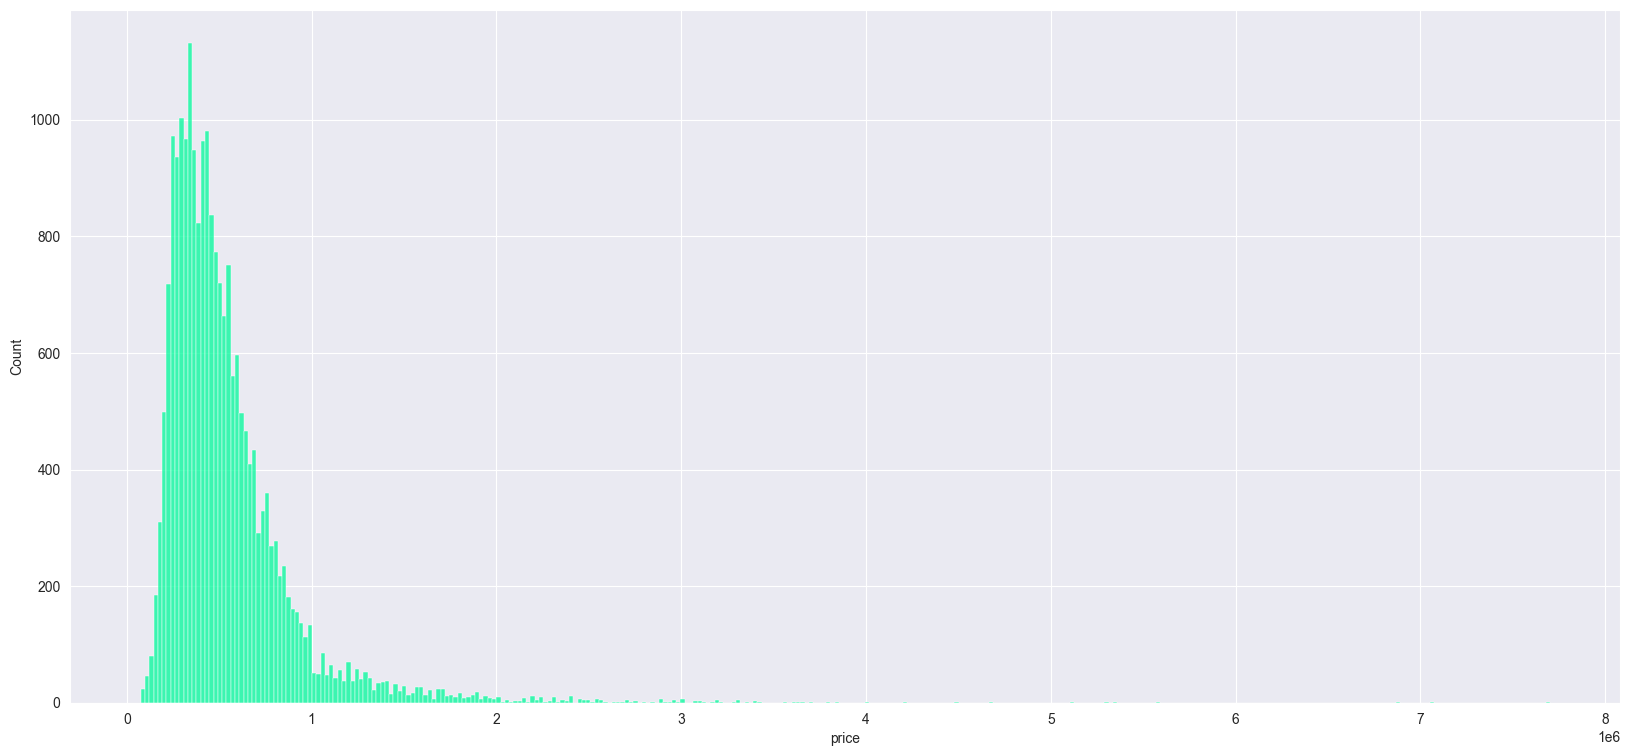

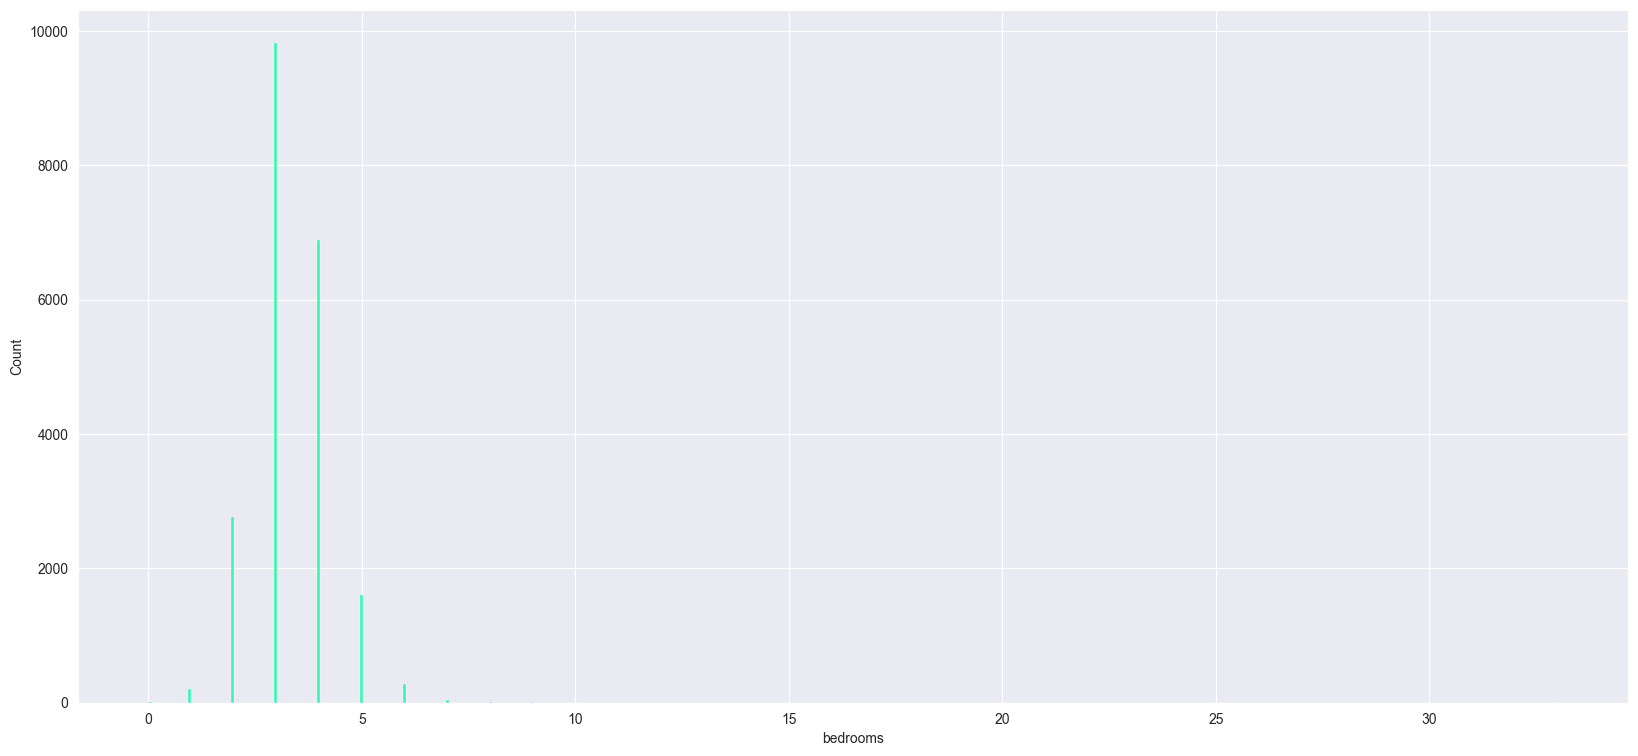

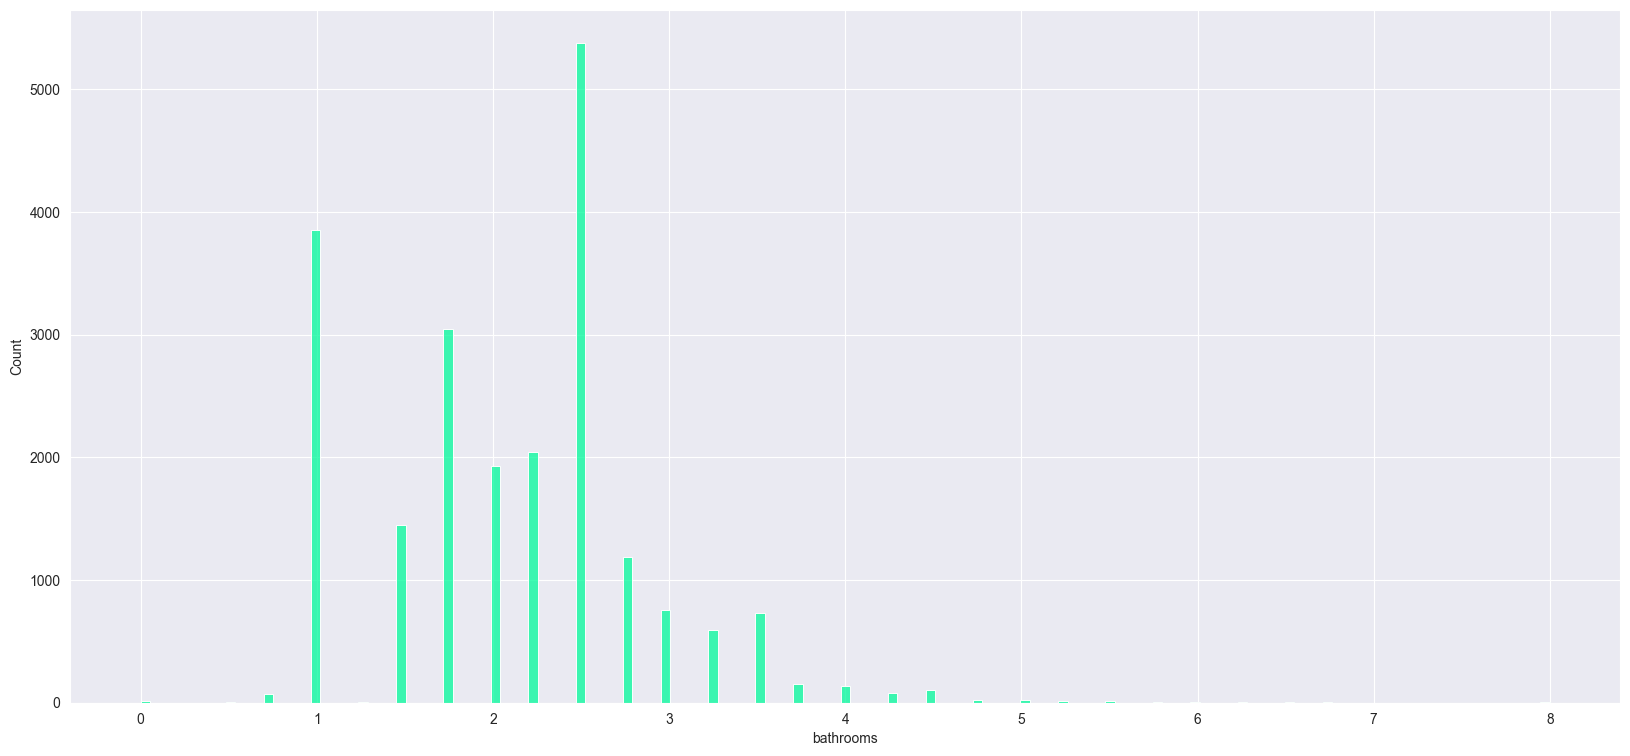

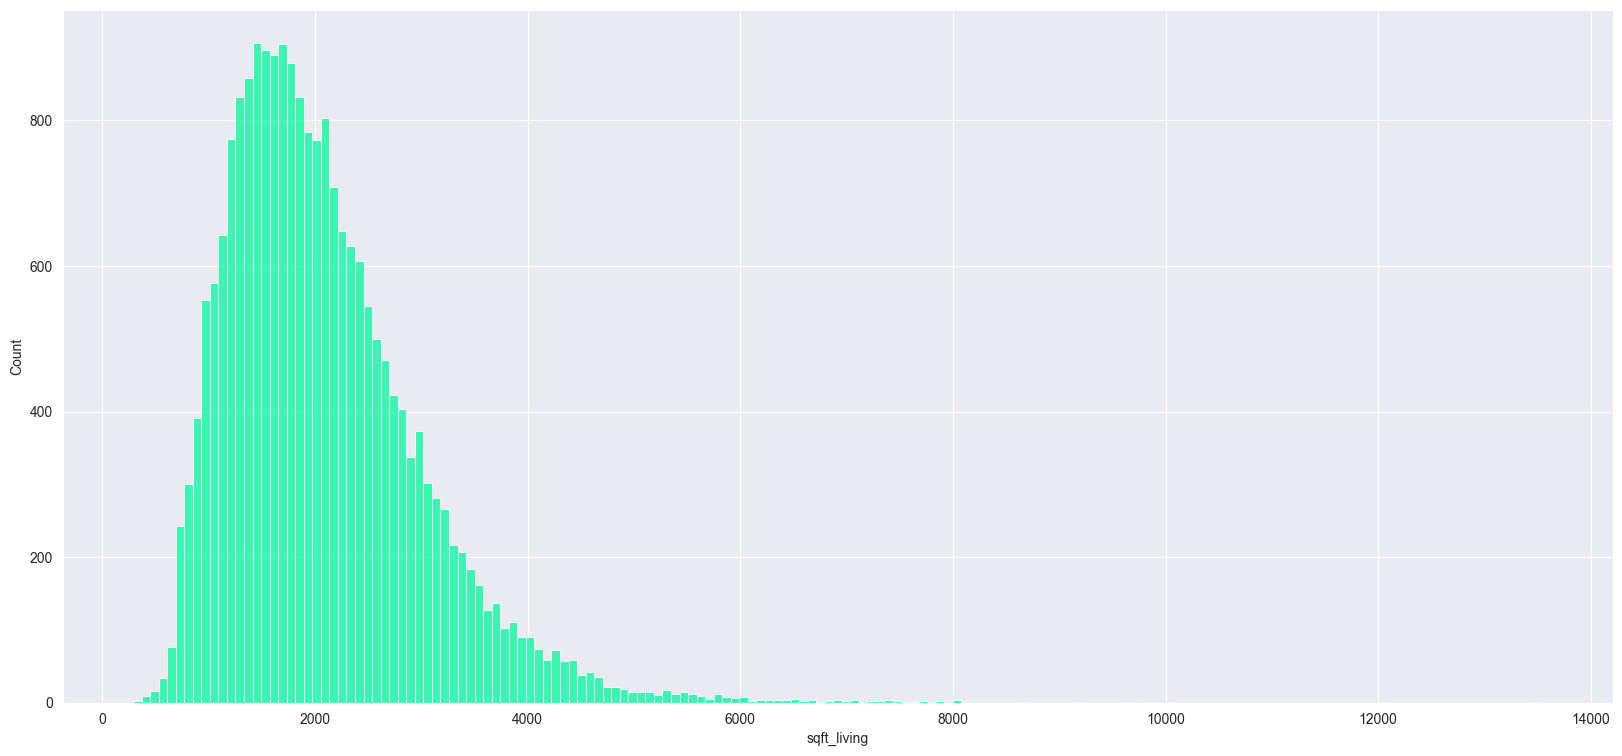

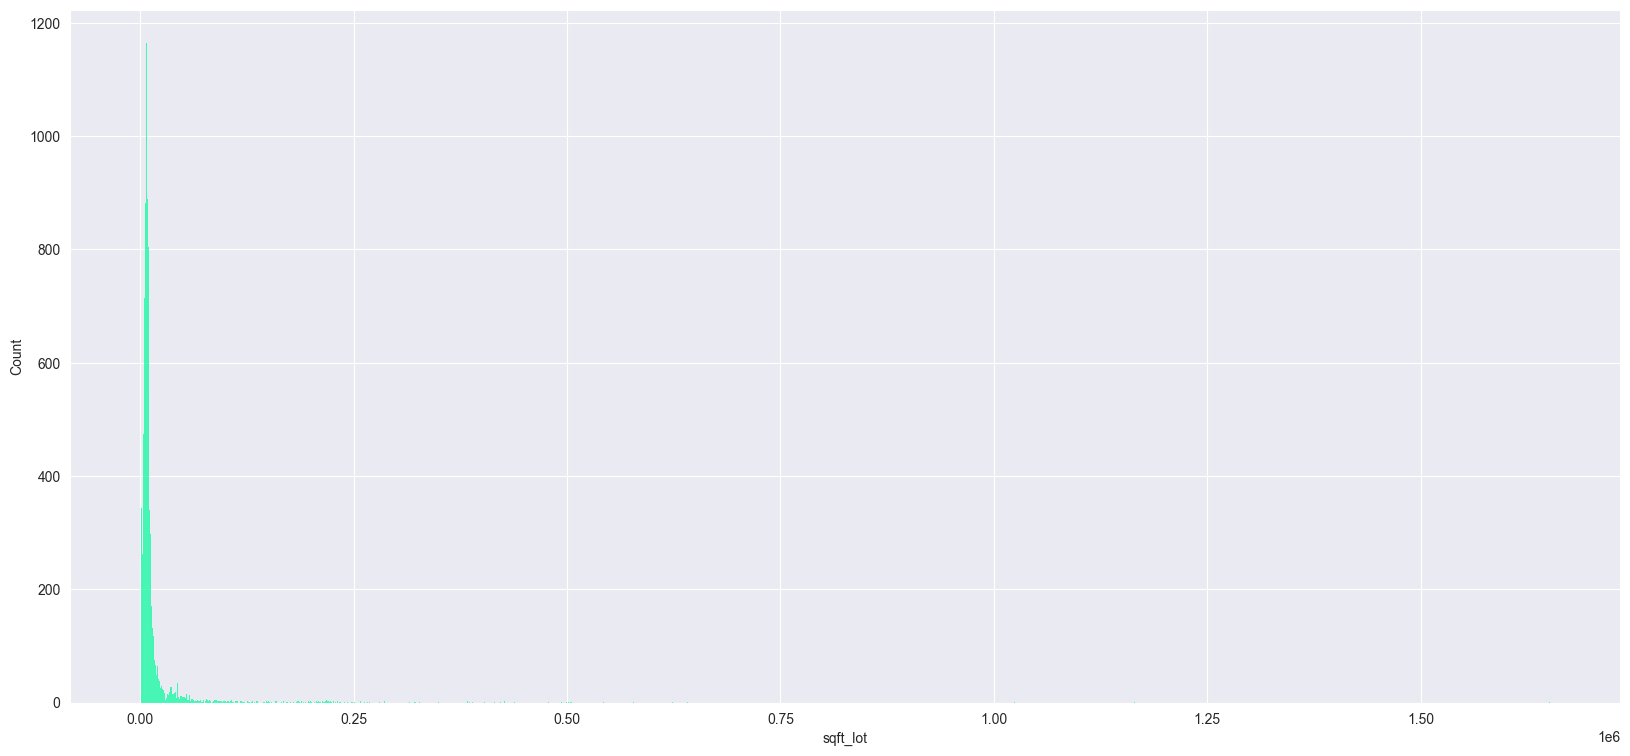

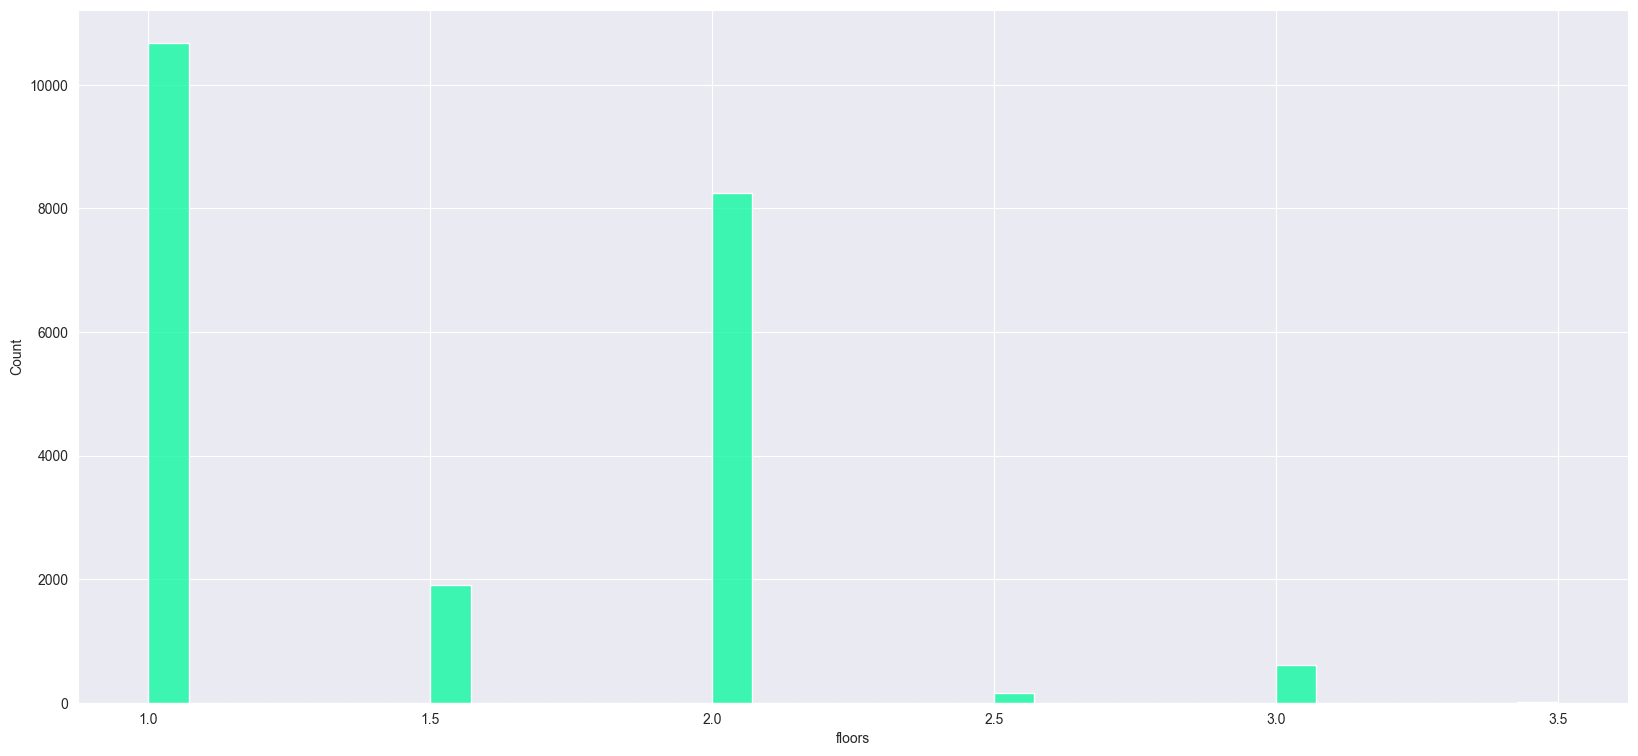

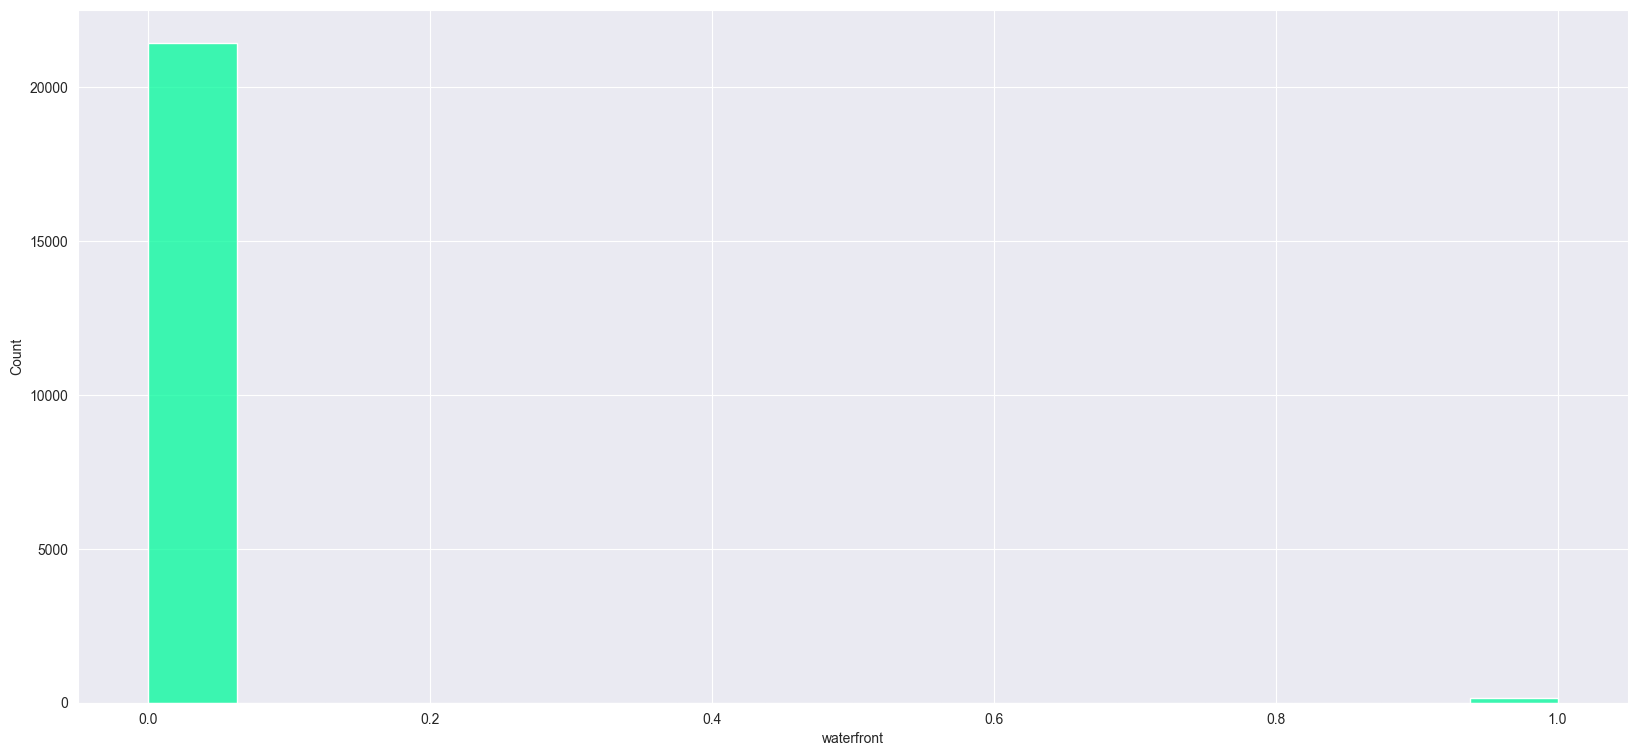

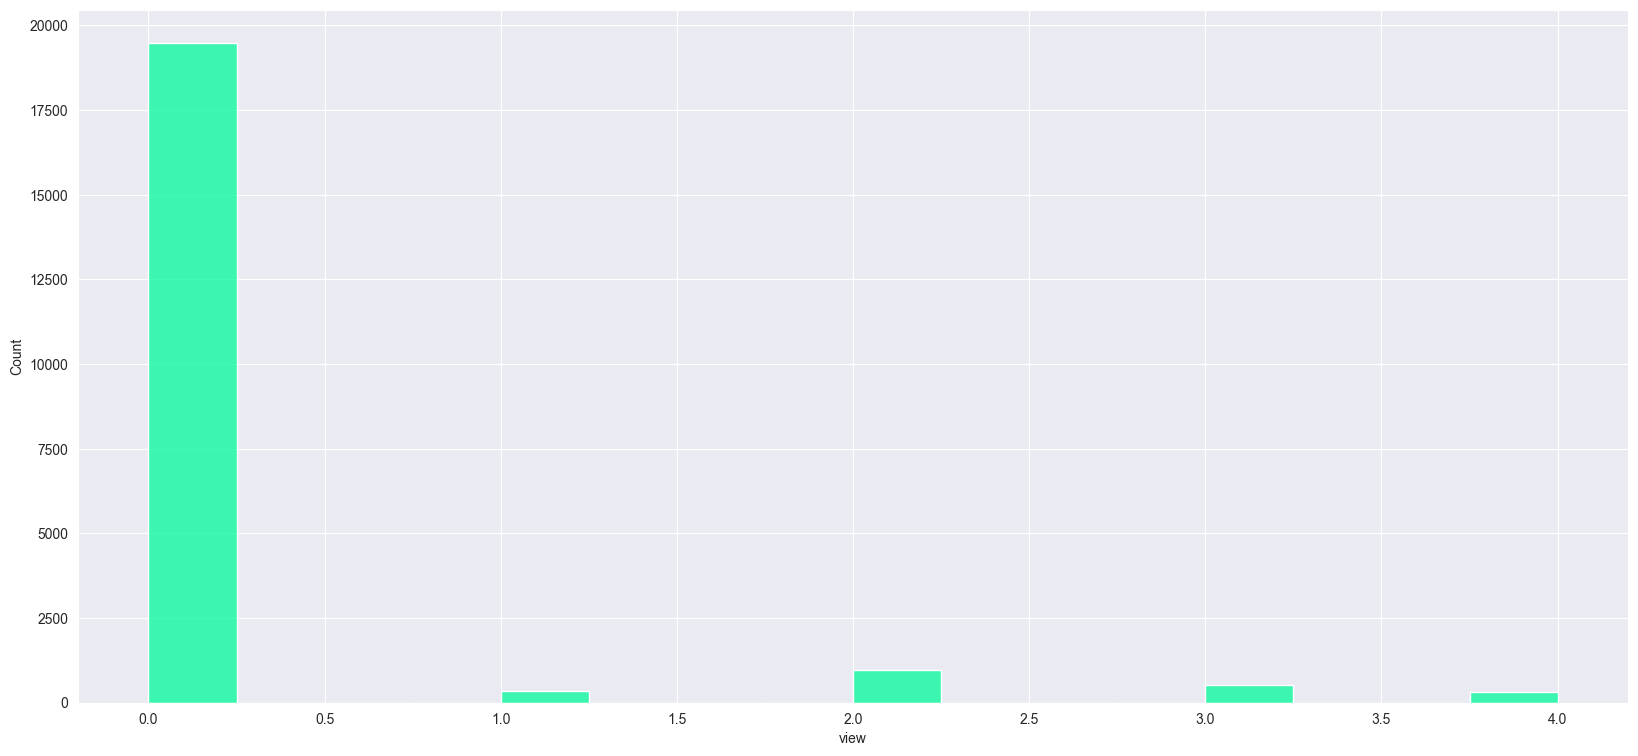

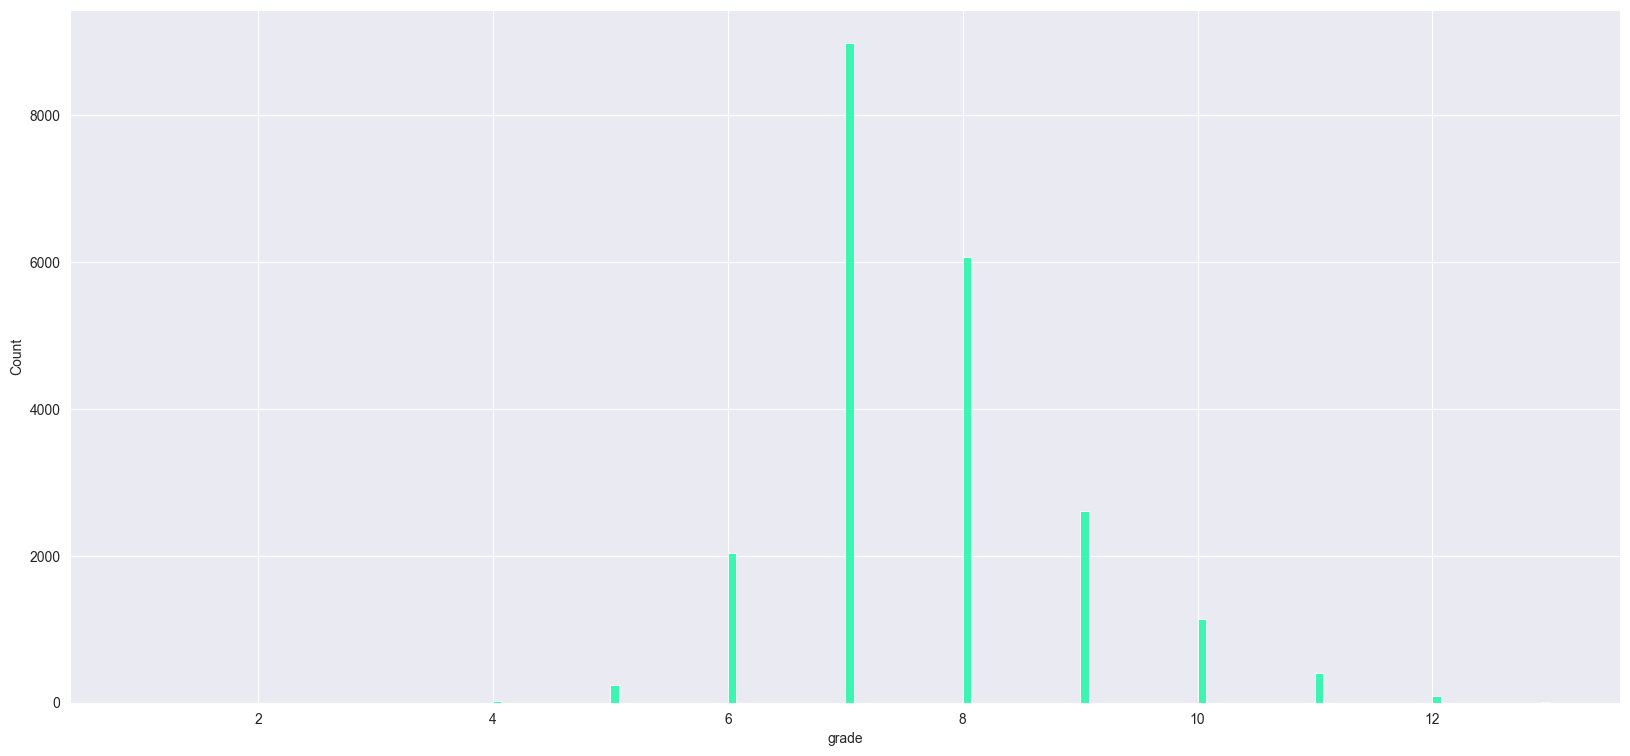

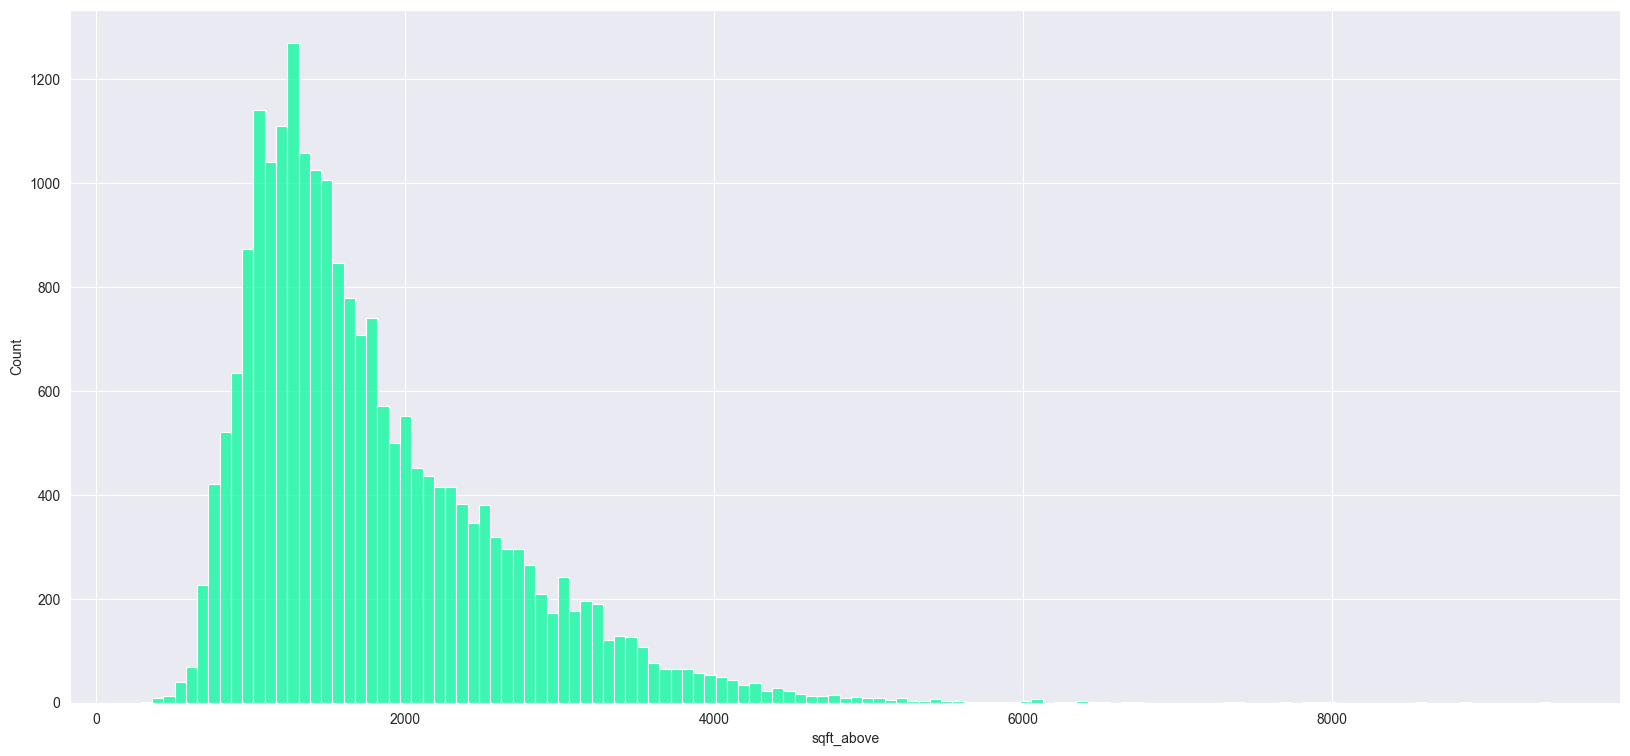

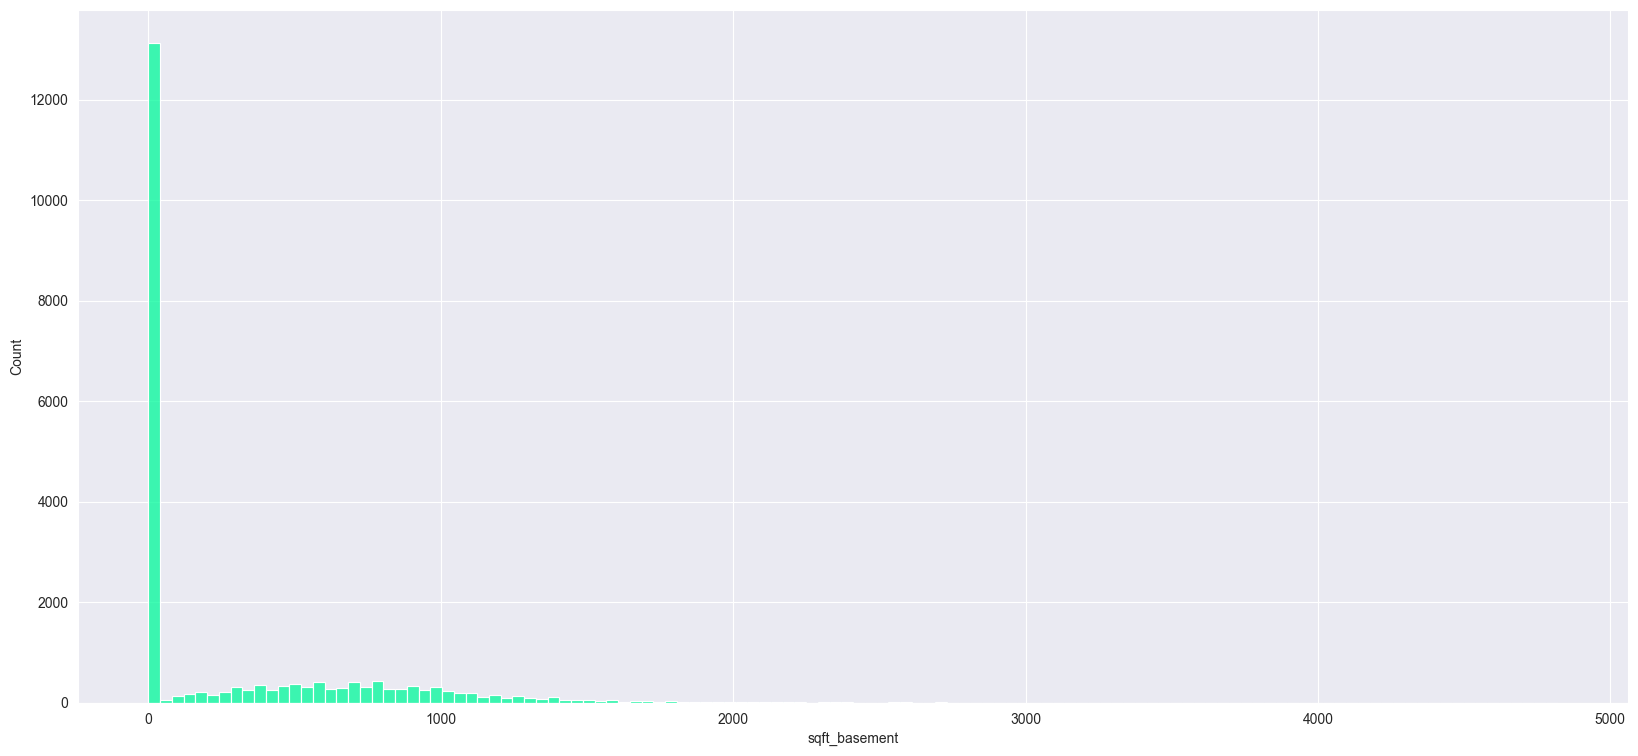

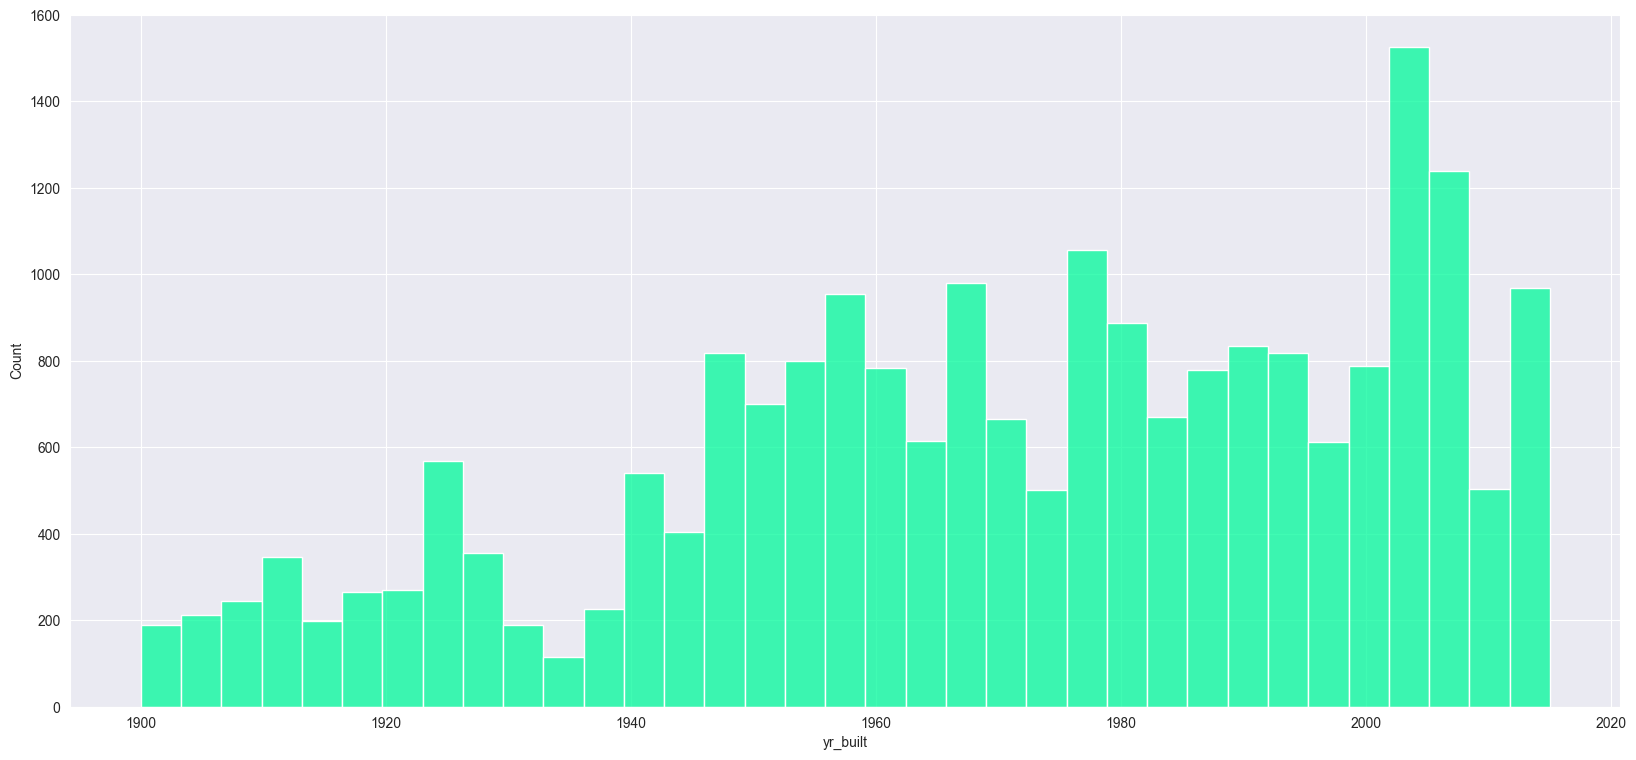

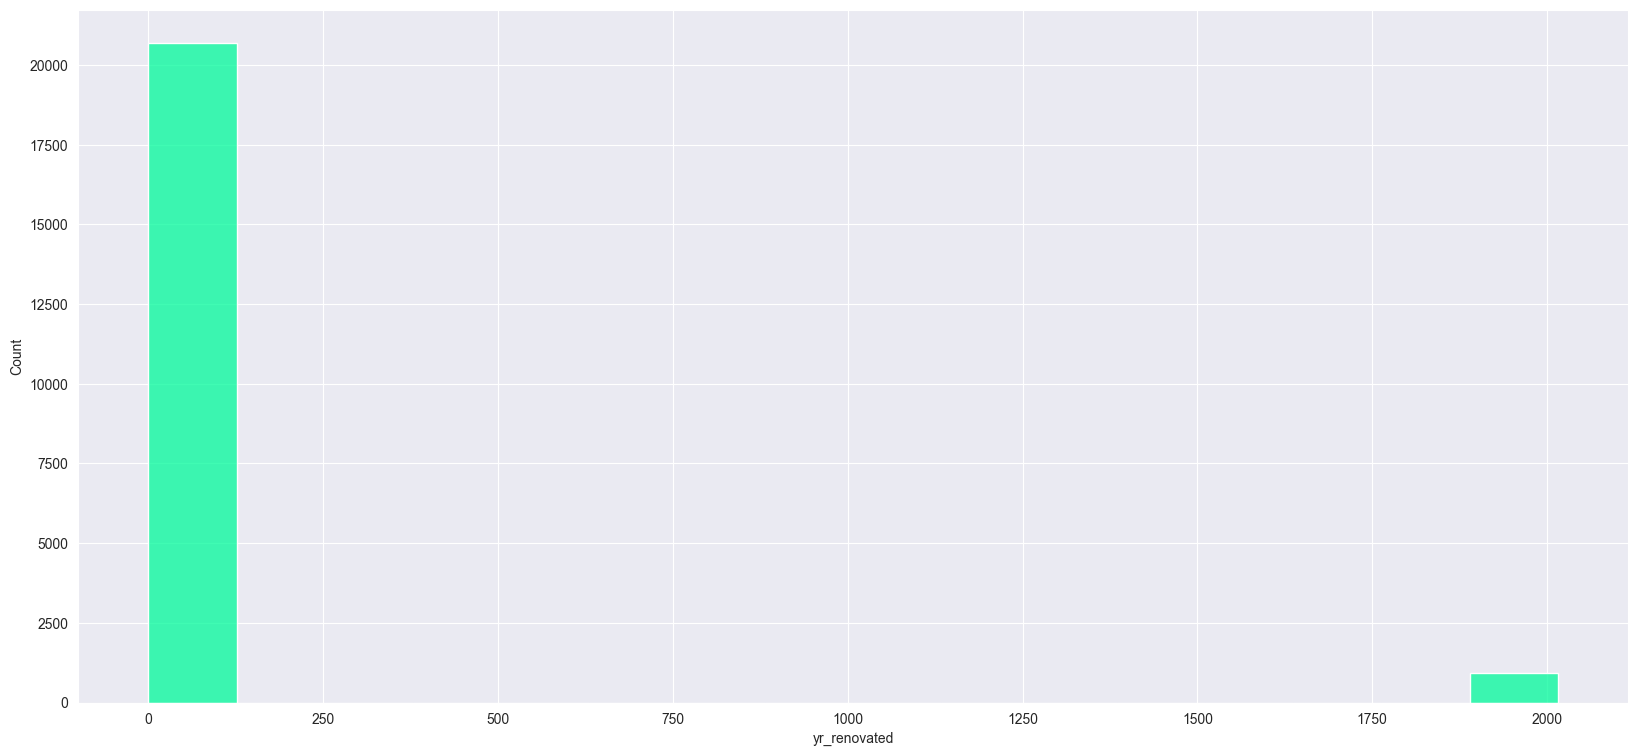

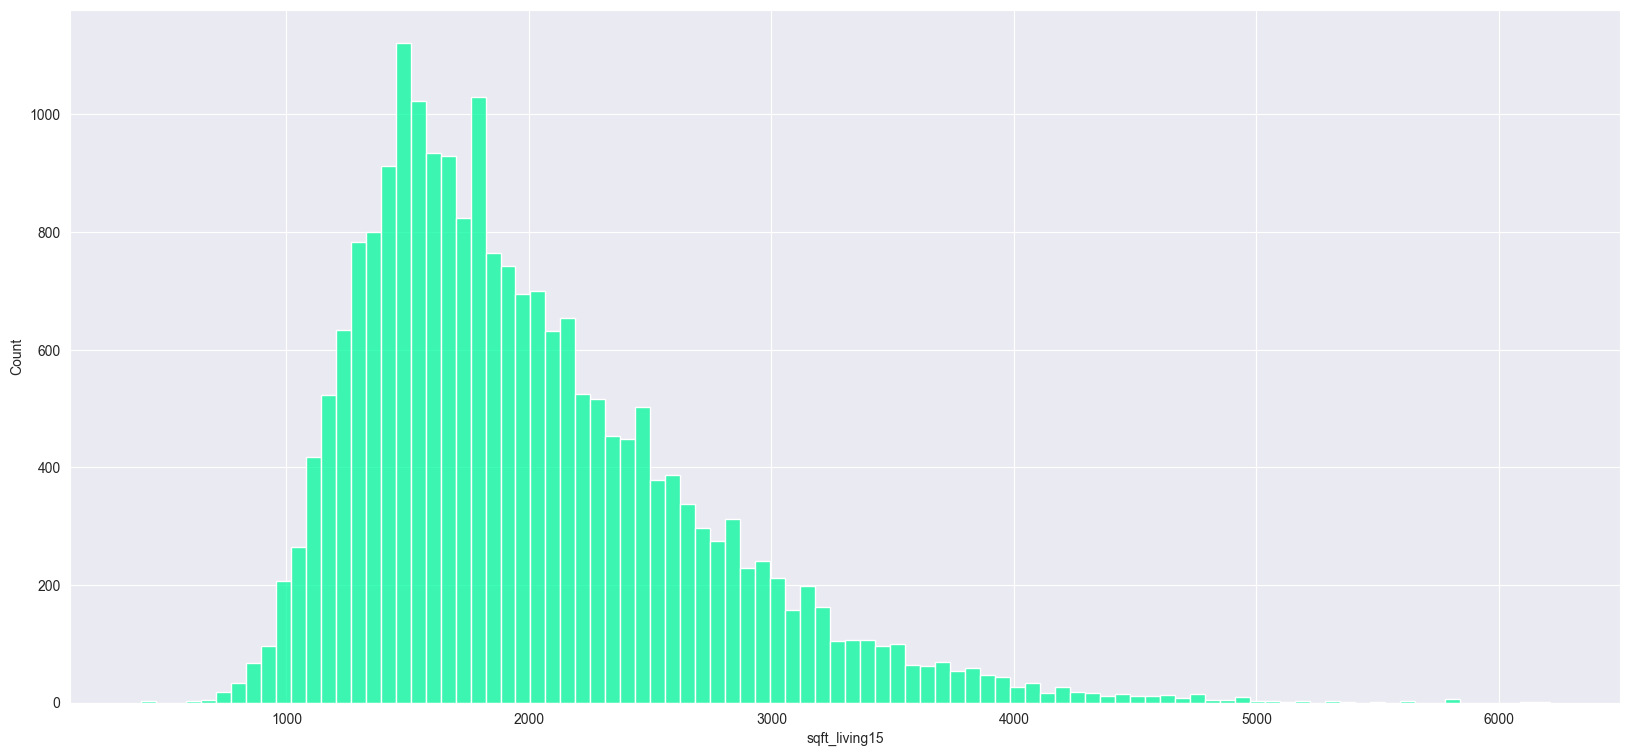

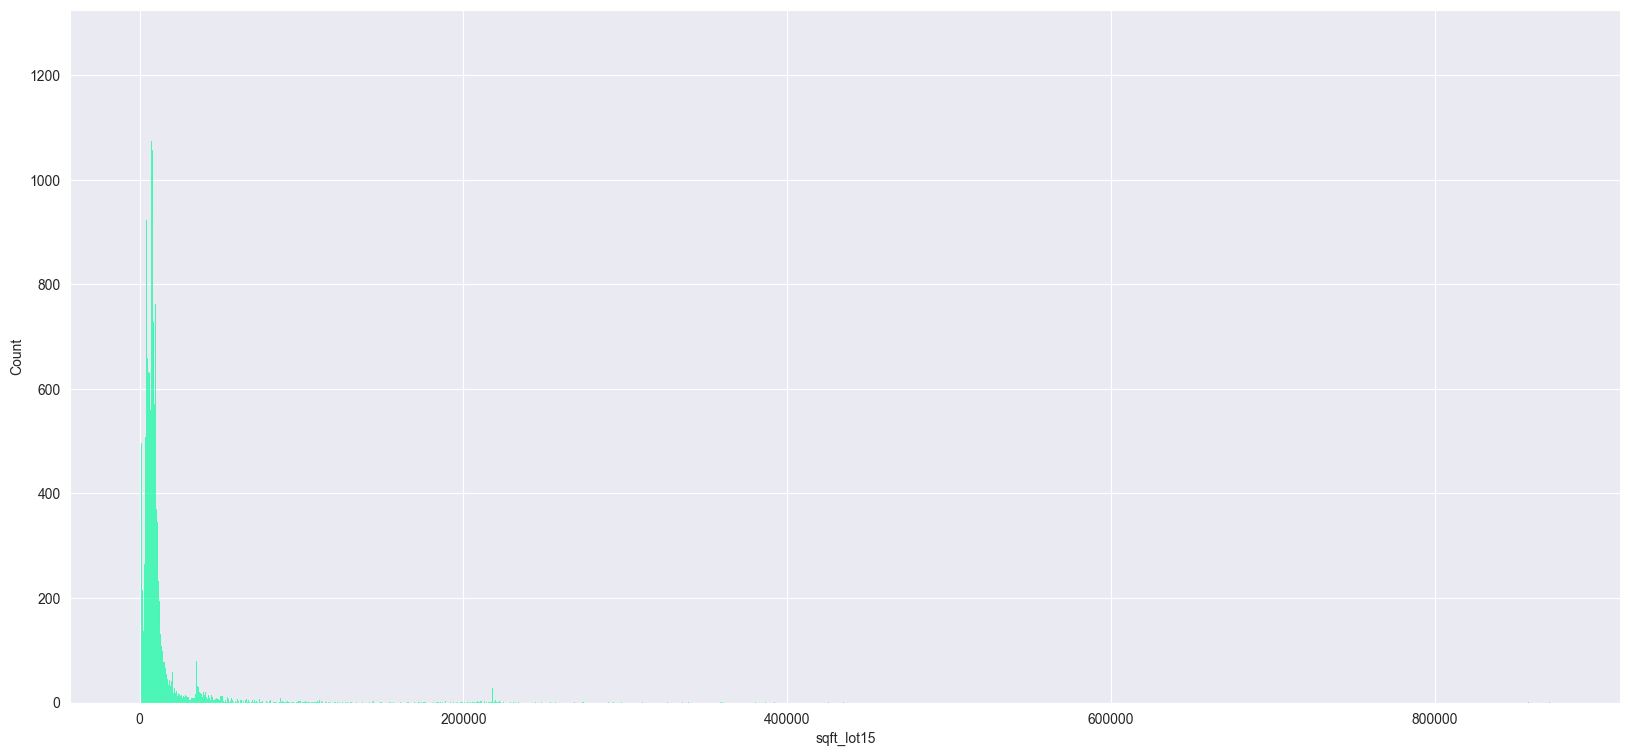

In [42]:
for col in data.columns:
    plt.figure(figsize=(20, 9))
    sns.histplot(data[col], color="mediumspringgreen")
    plt.show()

In [43]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180.0,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170.0,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770.0,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050.0,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680.0,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,8,1530.0,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,8,2310.0,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,7,1020.0,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,8,1600.0,0,2004,0,1410,1287


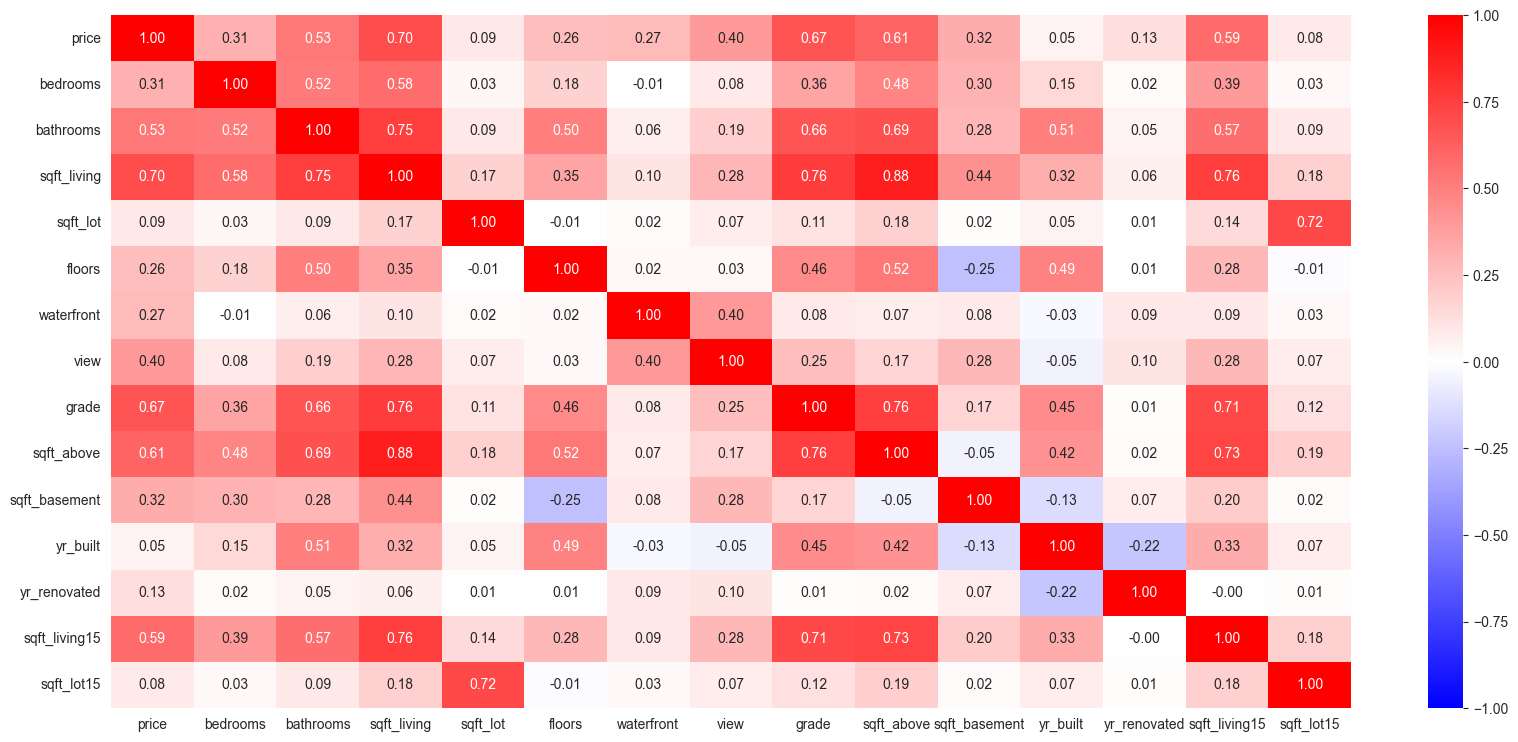

In [44]:
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), cmap="bwr", vmin=-1, annot=True, fmt=".2f")
plt.show()

In [45]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
data = pd.DataFrame(rs.fit_transform(data), columns=data.columns)

In [46]:
from sklearn.impute import KNNImputer

knnimput = KNNImputer()
knnimput.fit_transform(data)

array([[-7.06082650e-01,  0.00000000e+00, -1.66666667e+00, ...,
         0.00000000e+00, -5.74712644e-01, -3.95344170e-01],
       [ 2.72403653e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.99100000e+03, -1.72413793e-01,  3.81296408e-03],
       [-8.35783934e-01, -1.00000000e+00, -1.66666667e+00, ...,
         0.00000000e+00,  1.01149425e+00,  8.87015854e-02],
       ...,
       [-1.48271165e-01, -1.00000000e+00, -2.00000000e+00, ...,
         0.00000000e+00, -9.42528736e-01, -1.12642986e+00],
       [-1.54774803e-01,  0.00000000e+00,  3.33333333e-01, ...,
         0.00000000e+00, -4.94252874e-01, -1.27092113e+00],
       [-3.86937007e-01, -1.00000000e+00, -2.00000000e+00, ...,
         0.00000000e+00, -9.42528736e-01, -1.25687337e+00]])

In [48]:
from sklearn.cluster import DBSCAN

data = data.dropna()

dbscan = DBSCAN(eps=1.2, min_samples=50).fit(data)
pd.Series(dbscan.labels_).unique()

array([ 0, -1], dtype=int64)

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

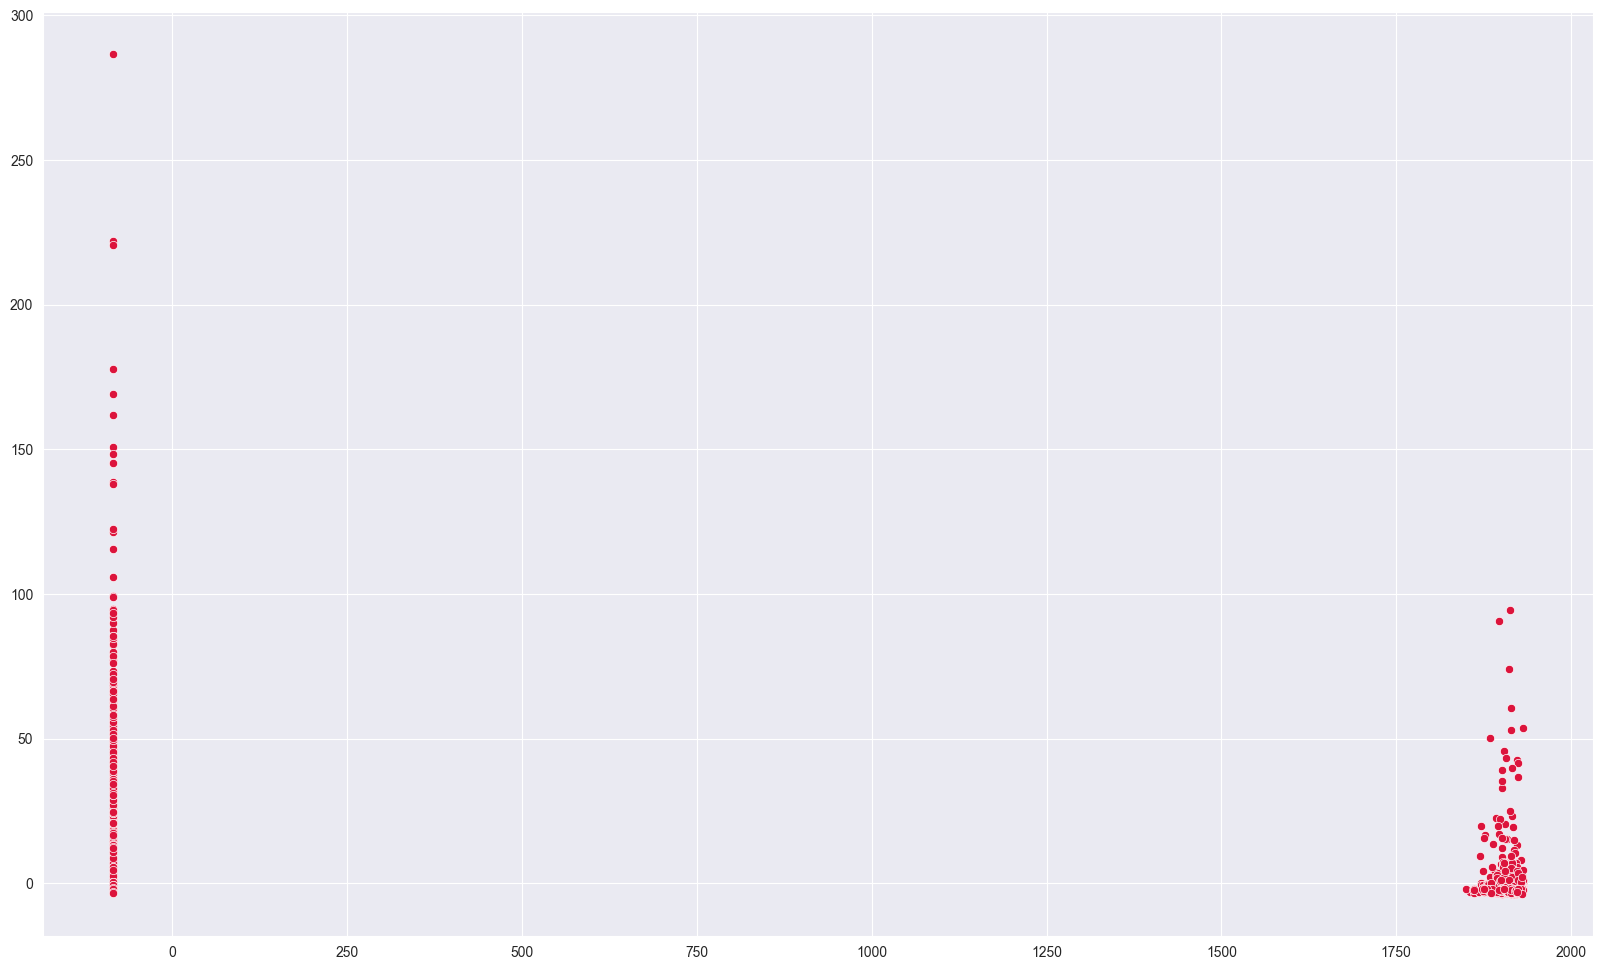

In [50]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], color="crimson")
plt.show()

In [51]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_data = tsne.fit_transform(data)

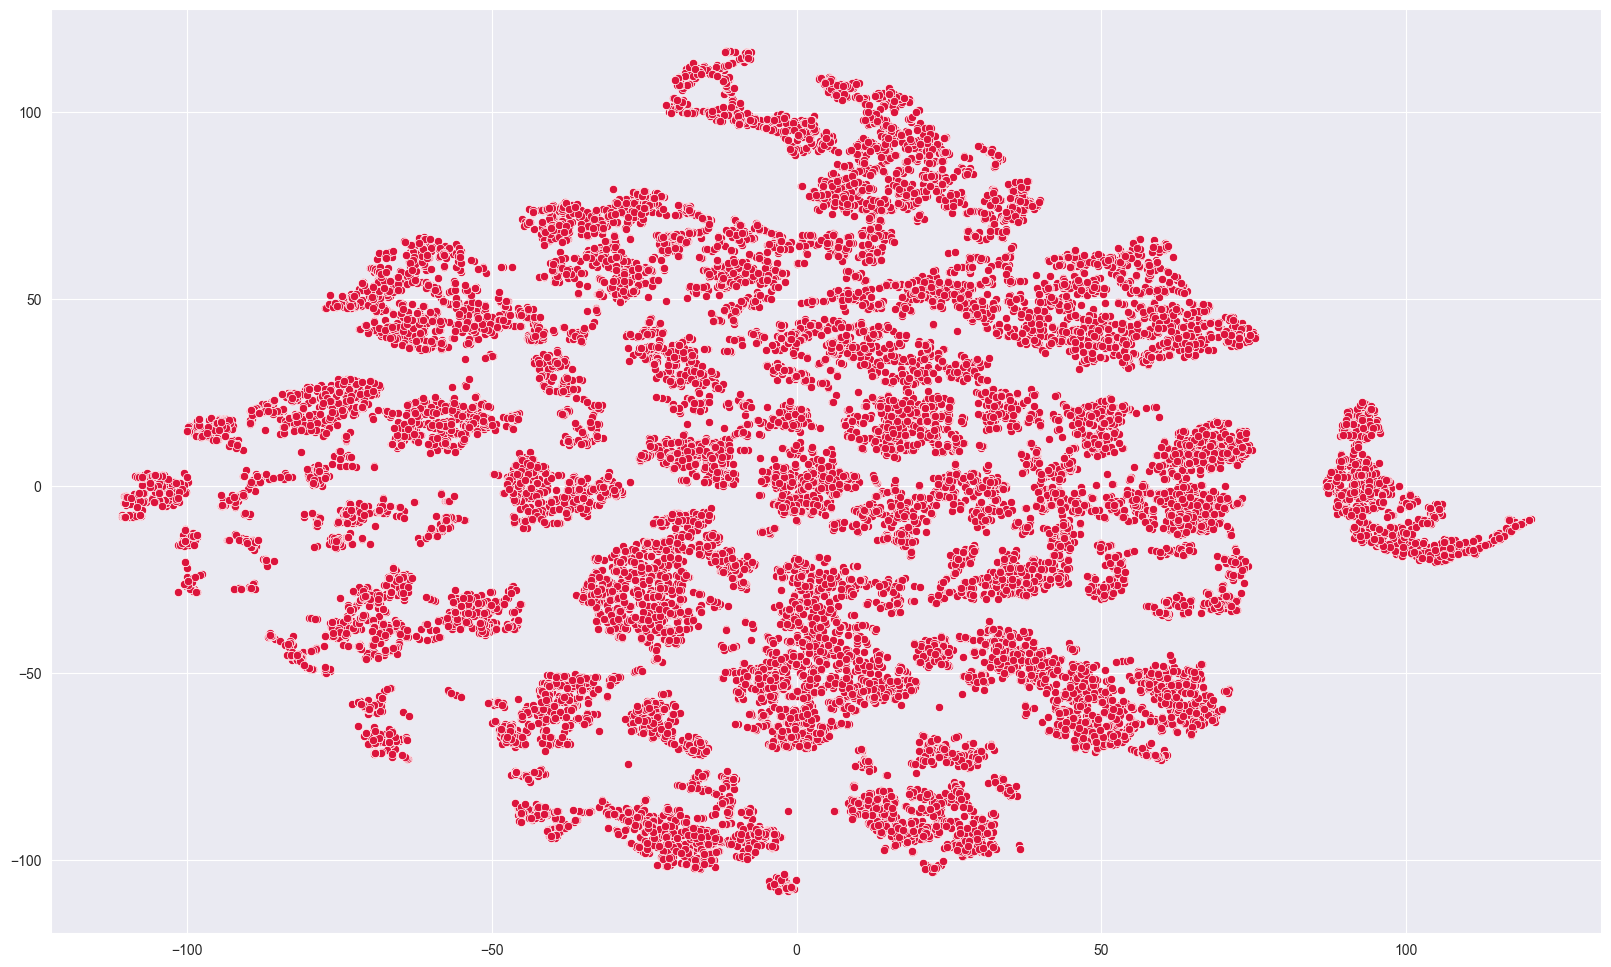

In [52]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], color="crimson")
plt.show()

In [67]:
from umap.umap_ import UMAP

embedding = UMAP().fit_transform(data)

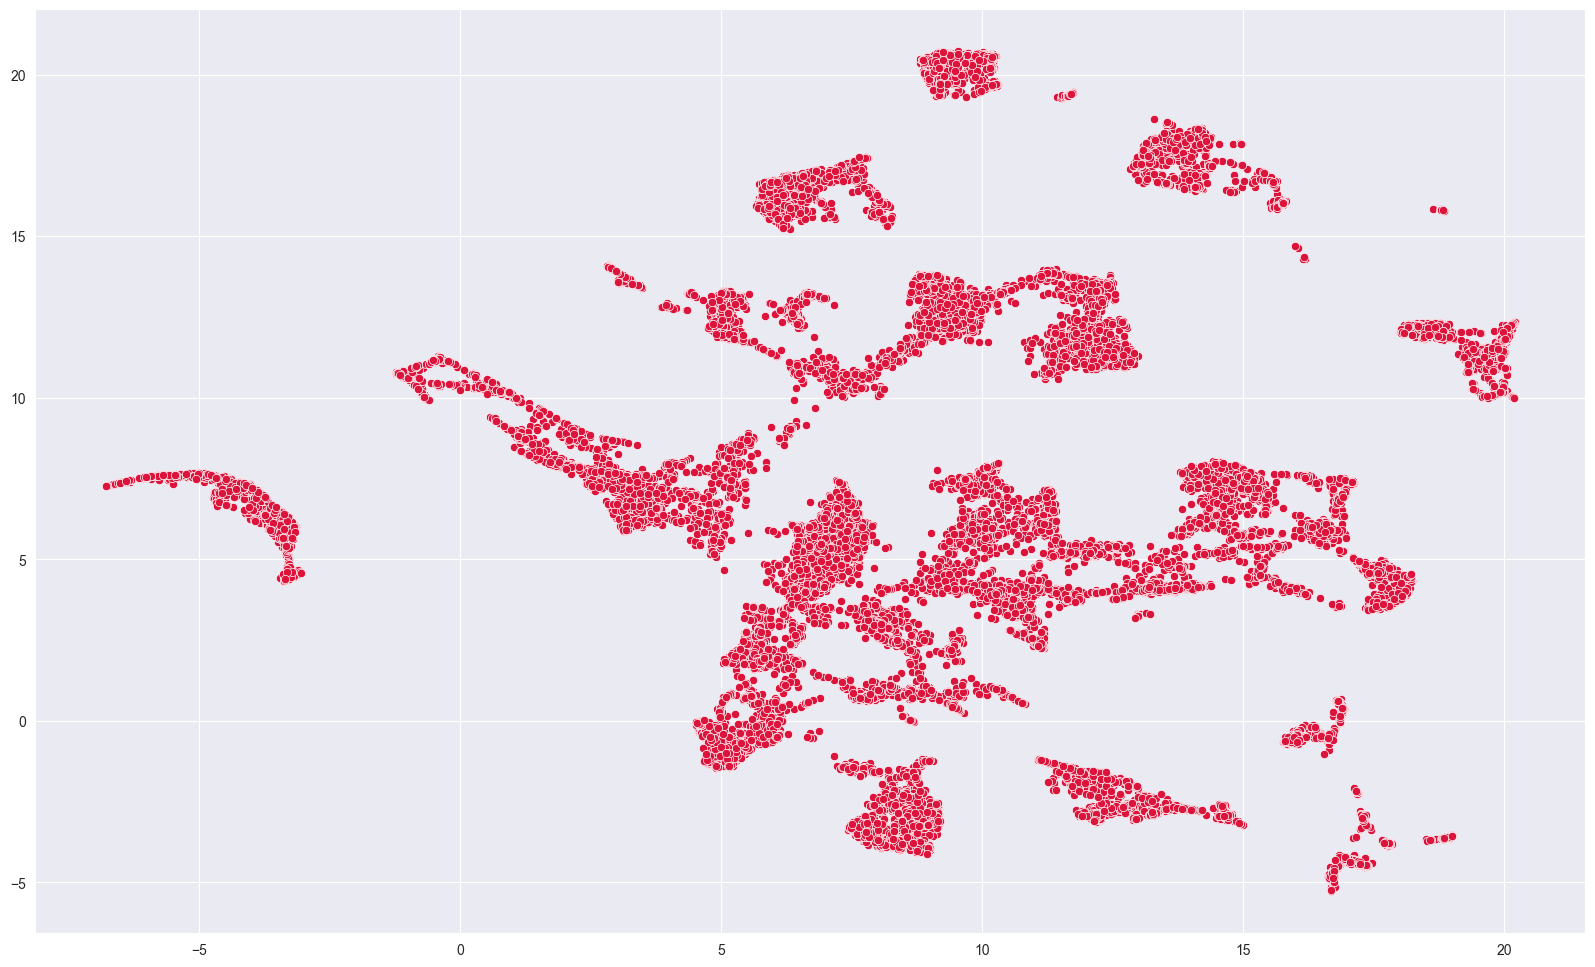

In [68]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], color="crimson")
plt.show()

In [69]:
colors = ["black", "crimson", "blue", "green", "lime", "peru", "orange", "blueviolet", "darkturquoise",
          "cornflowerblue", "slategray", "magenta", "brown", "yellow"]

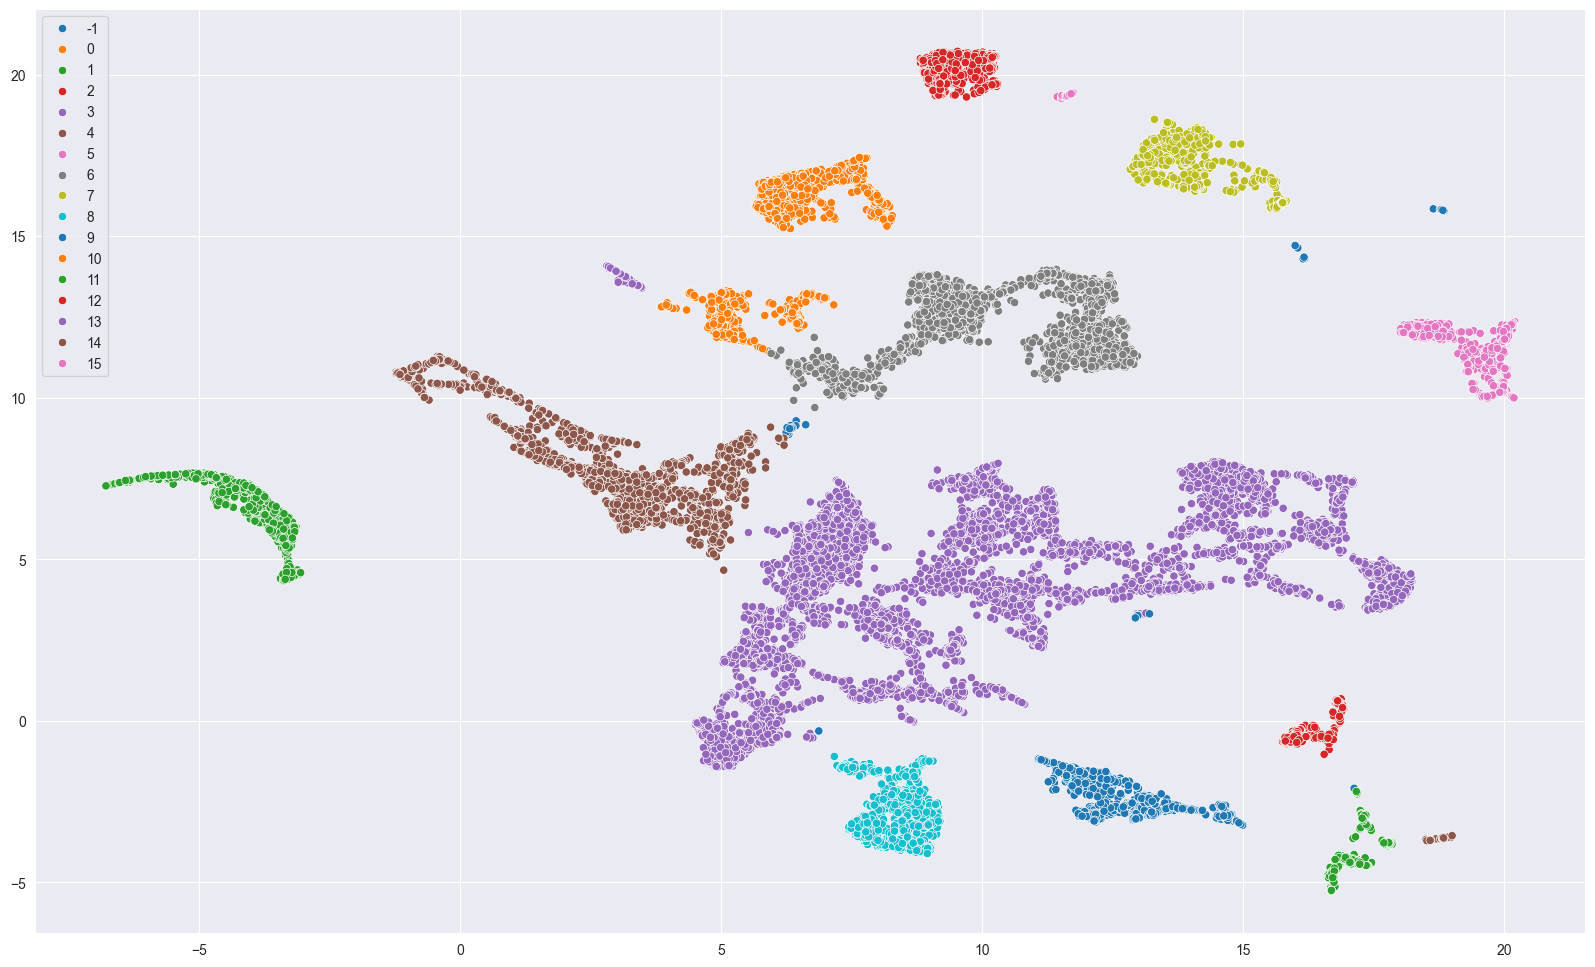

In [70]:
dbscan = DBSCAN(0.6, min_samples=55).fit(embedding)

plt.figure(figsize=(20, 12))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=dbscan.labels_, palette="tab10")
plt.show()

In [71]:
cluster_labels = pd.Series(dbscan.labels_)
cluster_labels.value_counts()

 3     8831
 6     2738
 4     1826
 8     1090
 7     1024
 0     1014
 9      945
 1      914
 5      795
 10     741
 2      689
 11     359
 12     295
 13     143
-1       88
 14      61
 15      58
Name: count, dtype: int64

In [72]:
for i in [14, 13]:
    cluster_labels[cluster_labels == i] = -1

In [73]:
cluster_labels.value_counts()

 3     8831
 6     2738
 4     1826
 8     1090
 7     1024
 0     1014
 9      945
 1      914
 5      795
 10     741
 2      689
 11     359
 12     295
-1      292
 15      58
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_14060\2790600737.py:2: UserWarning: 
The palette list has fewer values (14) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=cluster_labels, palette=colors)


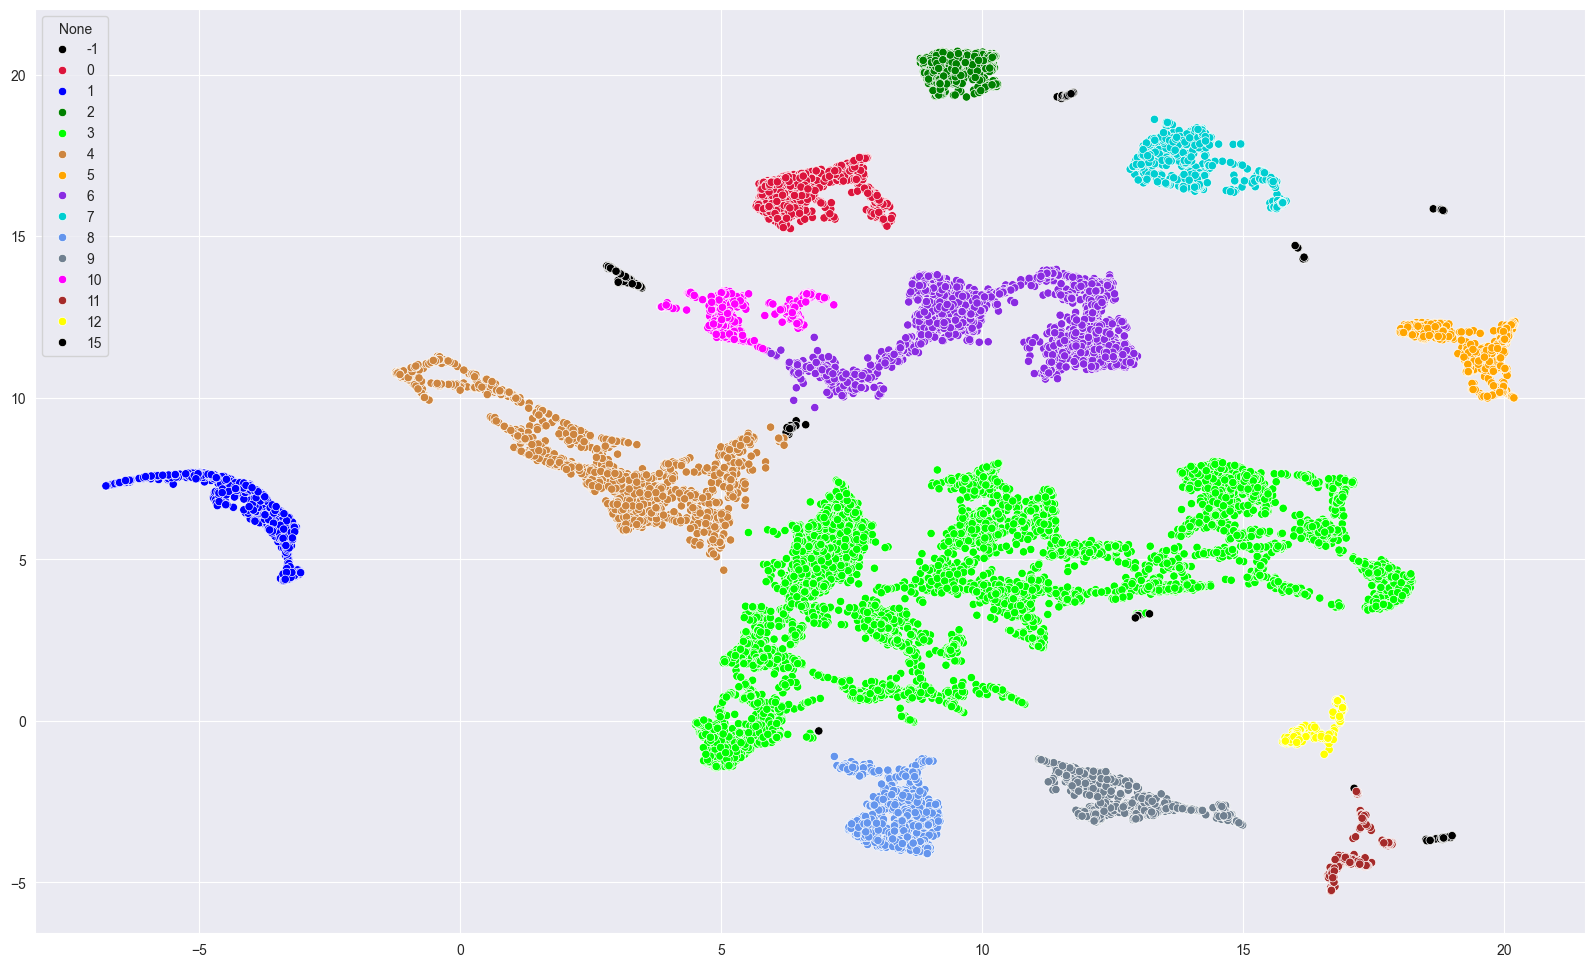

In [74]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=cluster_labels, palette=colors)
plt.show()